In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

In [156]:
data=pd.read_csv('/content/House_Pricing (1).csv')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [157]:
data.size

453873

In [158]:
data.shape

(21613, 21)

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [160]:
data.isna()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [161]:
data.isna().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

In [162]:
data.drop(['No of Times Visited'],axis=1,inplace=True)
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [163]:
data.drop(['ID'],axis=1,inplace=True)

In [164]:
data.isna().sum()

Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [165]:
data.drop_duplicates(inplace=True)
data.head()

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


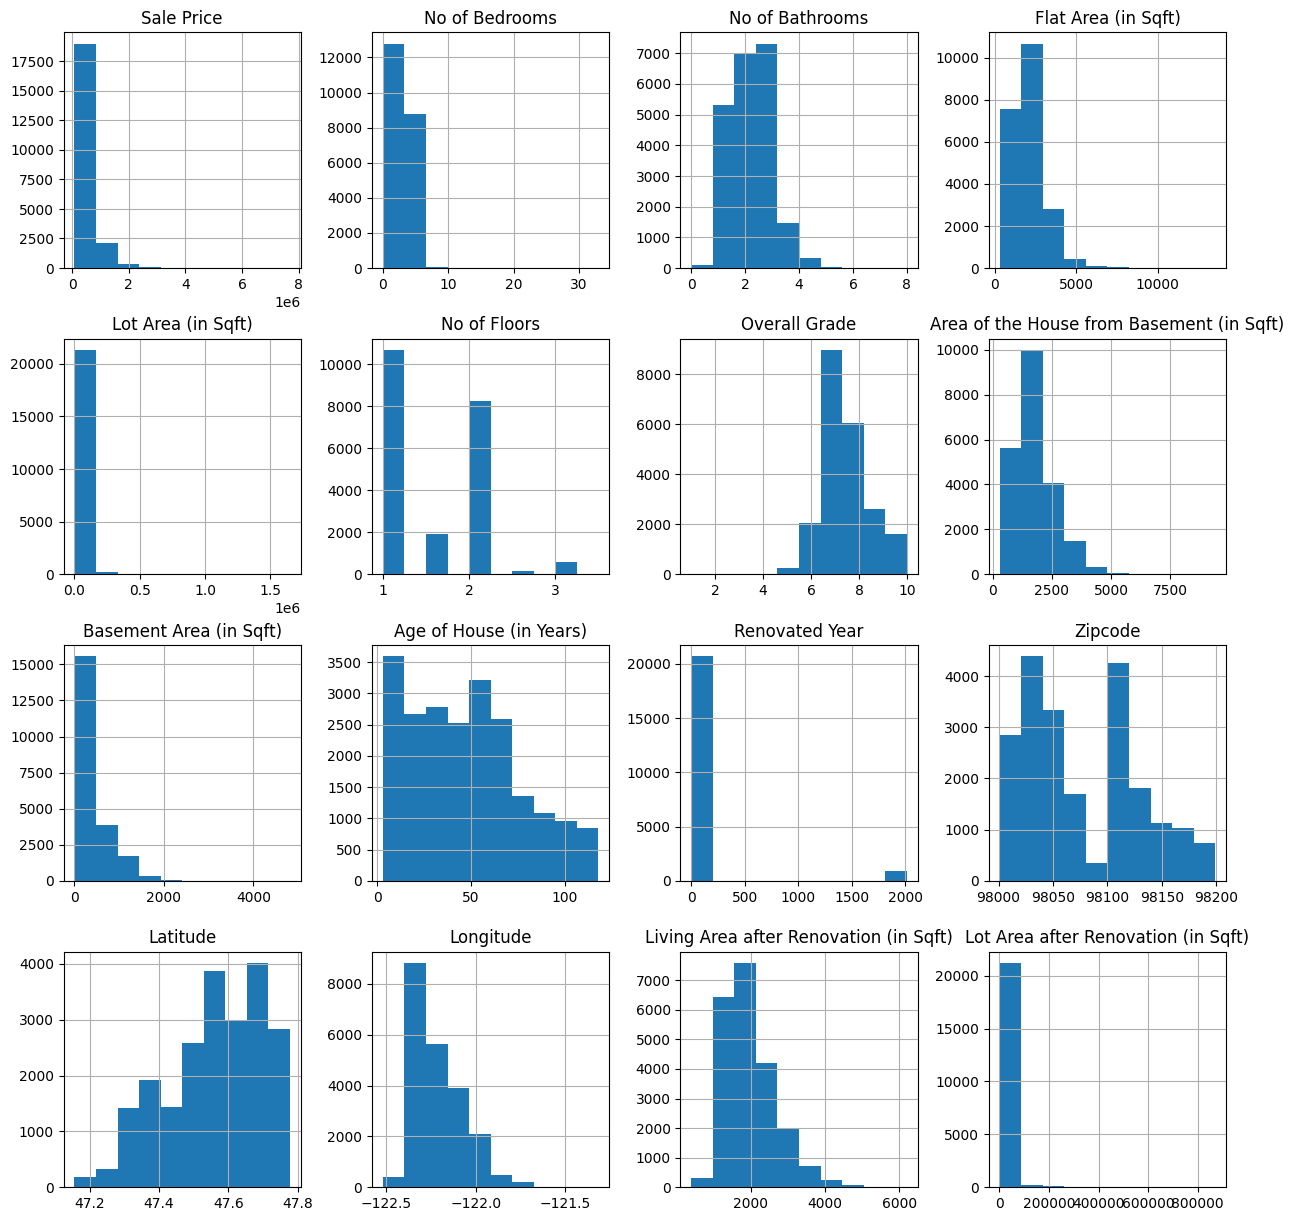

In [166]:
data.hist(figsize=(15,15))
plt.show()

In [167]:
for col in data.select_dtypes(include=[np.number]).columns:
  data[col].fillna(data[col].median(),inplace=True)
data.isna().sum()




Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21611 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date House was Sold                        21611 non-null  object 
 1   Sale Price                                 21611 non-null  float64
 2   No of Bedrooms                             21611 non-null  int64  
 3   No of Bathrooms                            21611 non-null  float64
 4   Flat Area (in Sqft)                        21611 non-null  float64
 5   Lot Area (in Sqft)                         21611 non-null  float64
 6   No of Floors                               21611 non-null  float64
 7   Waterfront View                            21611 non-null  object 
 8   Condition of the House                     21611 non-null  object 
 9   Overall Grade                              21611 non-null  int64  
 10  Area of the House from Base

In [169]:
data['Date House was Sold']=pd.to_datetime(data['Date House was Sold'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21611 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Date House was Sold                        21611 non-null  datetime64[ns]
 1   Sale Price                                 21611 non-null  float64       
 2   No of Bedrooms                             21611 non-null  int64         
 3   No of Bathrooms                            21611 non-null  float64       
 4   Flat Area (in Sqft)                        21611 non-null  float64       
 5   Lot Area (in Sqft)                         21611 non-null  float64       
 6   No of Floors                               21611 non-null  float64       
 7   Waterfront View                            21611 non-null  object        
 8   Condition of the House                     21611 non-null  object        
 9   Overall Grade         

In [170]:
data.head()

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,2017-10-14,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,2017-12-14,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,2016-02-15,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2017-12-14,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,2016-02-15,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


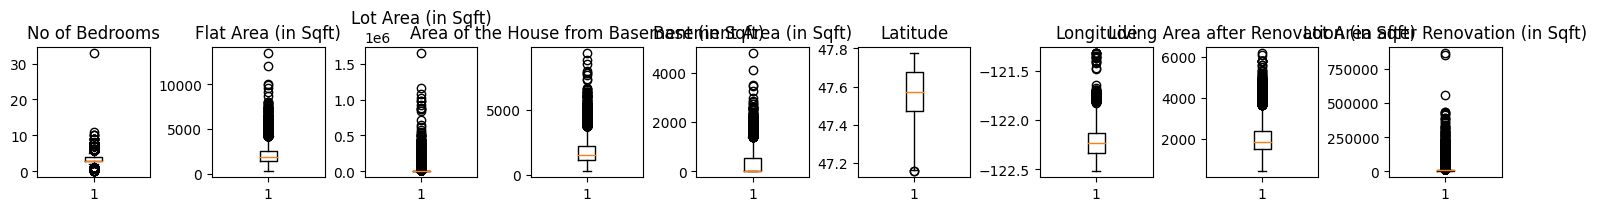

In [171]:
fig,ax=plt.subplots(1,9,figsize=(15,2),constrained_layout=True)

ax[0].boxplot(data['No of Bedrooms'])
ax[0].set_title('No of Bedrooms')

ax[1].boxplot(data['Flat Area (in Sqft)'])
ax[1].set_title('Flat Area (in Sqft)')

ax[2].boxplot(data['Lot Area (in Sqft)'])
ax[2].set_title('Lot Area (in Sqft)')

ax[3].boxplot(data['Area of the House from Basement (in Sqft)'])
ax[3].set_title('Area of the House from Basement (in Sqft)')

ax[4].boxplot(data['Basement Area (in Sqft)'])
ax[4].set_title('Basement Area (in Sqft)')

ax[5].boxplot(data['Latitude'])
ax[5].set_title('Latitude')

ax[6].boxplot(data['Longitude'])
ax[6].set_title('Longitude')

ax[7].boxplot(data['Living Area after Renovation (in Sqft)'])
ax[7].set_title('Living Area after Renovation (in Sqft)')

ax[8].boxplot(data['Lot Area after Renovation (in Sqft)'])
ax[8].set_title('Lot Area after Renovation (in Sqft)')

plt.show()

In [172]:
for col in data.select_dtypes(include=[np.number]).columns:
  Q1 = np.percentile(data[col],25)
  Q3 = np.percentile(data[col],75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]



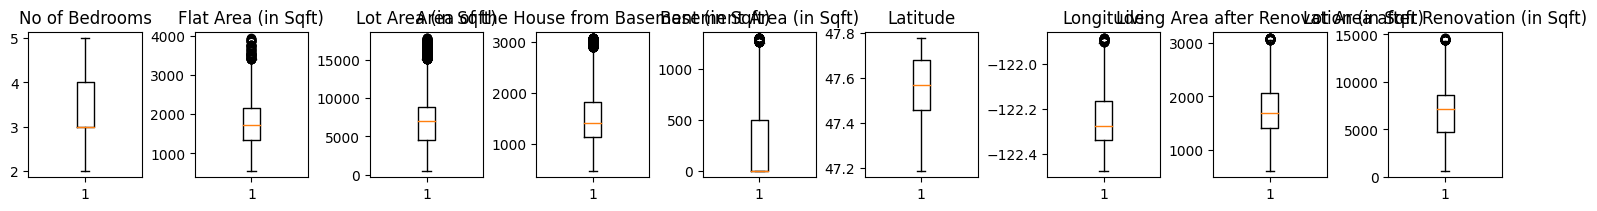

In [173]:
fig,ax=plt.subplots(1,9,figsize=(15,2),constrained_layout=True)

ax[0].boxplot(data['No of Bedrooms'])
ax[0].set_title('No of Bedrooms')

ax[1].boxplot(data['Flat Area (in Sqft)'])
ax[1].set_title('Flat Area (in Sqft)')

ax[2].boxplot(data['Lot Area (in Sqft)'])
ax[2].set_title('Lot Area (in Sqft)')

ax[3].boxplot(data['Area of the House from Basement (in Sqft)'])
ax[3].set_title('Area of the House from Basement (in Sqft)')

ax[4].boxplot(data['Basement Area (in Sqft)'])
ax[4].set_title('Basement Area (in Sqft)')

ax[5].boxplot(data['Latitude'])
ax[5].set_title('Latitude')

ax[6].boxplot(data['Longitude'])
ax[6].set_title('Longitude')

ax[7].boxplot(data['Living Area after Renovation (in Sqft)'])
ax[7].set_title('Living Area after Renovation (in Sqft)')

ax[8].boxplot(data['Lot Area after Renovation (in Sqft)'])
ax[8].set_title('Lot Area after Renovation (in Sqft)')

plt.show()

encoding



In [174]:
data['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Okay', 'Bad'], dtype=object)

In [175]:
data['Waterfront View'].unique()

array(['No', 'Yes'], dtype=object)

In [176]:
data['Waterfront View'].value_counts()

Waterfront View
No     14846
Yes       14
Name: count, dtype: int64

In [177]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
categorical_cols = ['Waterfront View','Condition of the House']
numerical_cols = ['Sale Price','No of Bedrooms','Flat Area (in Sqft)','Age of House (in Years)']
data_encoded = pd.get_dummies(data, columns=categorical_cols,dtype=int,drop_first=True)
data_encoded.head()

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,2017-10-14,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,...,98178.0,47.5112,-122.257,1340.0,5650,0,0,1,0,0
2,2016-02-15,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,...,98028.0,47.7379,-122.233,2720.0,8062,0,0,1,0,0
3,2017-12-14,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,910,...,98136.0,47.5208,-122.393,1360.0,5000,0,1,0,0,0
4,2016-02-15,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,0,...,98074.0,47.6168,-122.045,1800.0,7503,0,0,1,0,0
6,2017-06-14,257500.0,3,2.25,1715.0,6819.0,2.0,7,1715.0,0,...,98003.0,47.3097,-122.327,2238.0,6819,0,0,1,0,0


In [178]:
data_encoded.shape

(14860, 22)

In [179]:
data_std_scaled = data_encoded.copy()
std_scaler = StandardScaler()
data_std_scaled[numerical_cols] = std_scaler.fit_transform(data_std_scaled[numerical_cols])
data_std_scaled.head()

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,2017-10-14,-1.199924,-0.305789,1.00,-1.046277,5650.0,1.0,7,1180.0,0,...,98178.0,47.5112,-122.257,1340.0,5650,0,0,1,0,0
2,2016-02-15,-1.431059,-1.610417,1.00,-1.768845,10000.0,1.0,6,770.0,0,...,98028.0,47.7379,-122.233,2720.0,8062,0,0,1,0,0
3,2017-12-14,0.907880,0.998839,3.00,0.328364,5000.0,1.0,7,1050.0,910,...,98136.0,47.5208,-122.393,1360.0,5000,0,1,0,0,0
4,2016-02-15,0.389342,-0.305789,2.00,-0.165097,8080.0,1.0,8,1680.0,0,...,98074.0,47.6168,-122.045,1800.0,7503,0,0,1,0,0
6,2017-06-14,-1.003541,-0.305789,2.25,-0.103414,6819.0,2.0,7,1715.0,0,...,98003.0,47.3097,-122.327,2238.0,6819,0,0,1,0,0


In [180]:
data_minmax_scaled = data_encoded.copy()

minmax_scaler = MinMaxScaler()
data_minmax_scaled[numerical_cols] = minmax_scaler.fit_transform(data_minmax_scaled[numerical_cols])
data_minmax_scaled.head()

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,2017-10-14,0.134778,0.333333,1.00,0.183976,5650.0,1.0,7,1180.0,0,...,98178.0,47.5112,-122.257,1340.0,5650,0,0,1,0,0
2,2016-02-15,0.094412,0.000000,1.00,0.062315,10000.0,1.0,6,770.0,0,...,98028.0,47.7379,-122.233,2720.0,8062,0,0,1,0,0
3,2017-12-14,0.502890,0.666667,3.00,0.415430,5000.0,1.0,7,1050.0,910,...,98136.0,47.5208,-122.393,1360.0,5000,0,1,0,0,0
4,2016-02-15,0.412331,0.333333,2.00,0.332344,8080.0,1.0,8,1680.0,0,...,98074.0,47.6168,-122.045,1800.0,7503,0,0,1,0,0
6,2017-06-14,0.169075,0.333333,2.25,0.342730,6819.0,2.0,7,1715.0,0,...,98003.0,47.3097,-122.327,2238.0,6819,0,0,1,0,0


In [181]:
data_minmax_scaled.describe()

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
count,14860,14860.000000,14860.000000,14860.000000,14860.000000,14860.000000,14860.000000,14860.000000,14860.000000,14860.000000,...,14860.000000,14860.000000,14860.000000,14860.000000,14860.000000,14860.000000,14860.000000,14860.000000,14860.000000,14860.000000
mean,2017-03-03 18:03:00.242260992,0.344336,0.411463,1.951952,0.360142,6844.335935,1.450673,7.352624,1528.311373,245.379273,...,98083.057335,47.560374,-122.242783,1766.459354,6733.427456,0.000942,0.085666,0.633782,0.273082,0.006797
min,2016-01-15 00:00:00,0.000000,0.000000,0.500000,0.000000,520.000000,1.000000,6.000000,480.000000,0.000000,...,98001.000000,47.189500,-122.475000,620.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-15 00:00:00,0.210019,0.333333,1.500000,0.231454,4600.000000,1.000000,7.000000,1130.000000,0.000000,...,98033.000000,47.460800,-122.340000,1420.000000,4733.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017-06-14 00:00:00,0.311175,0.333333,2.000000,0.344214,6985.500000,1.000000,7.000000,1410.000000,0.000000,...,98092.000000,47.572000,-122.278000,1700.000000,7103.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2017-09-14 00:00:00,0.450867,0.666667,2.500000,0.475000,8800.000000,2.000000,8.000000,1830.000000,500.000000,...,98122.000000,47.683325,-122.166000,2070.000000,8580.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2017-12-14 00:00:00,1.000000,1.000000,4.000000,1.000000,17859.000000,3.500000,9.000000,3070.000000,1300.000000,...,98199.000000,47.777600,-121.886000,3080.000000,14600.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,0.174648,0.255509,0.647147,0.168380,3195.382036,0.548560,0.784046,533.359463,356.892436,...,54.468401,0.141787,0.115547,463.151982,2823.286922,0.030681,0.279880,0.481786,0.445558,0.082165


In [182]:
corr_cols = ['Sale Price','No of Bedrooms','Flat Area (in Sqft)','Age of House (in Years)']
data_corr = data_encoded[corr_cols].corr()
data_corr.head()

,Sale Price,No of Bedrooms,Flat Area (in Sqft),Age of House (in Years)
Sale Price,1.000000,0.199265,0.485344,0.080586
No of Bedrooms,0.199265,1.000000,0.600624,-0.130290
Flat Area (in Sqft),0.485344,0.600624,1.000000,-0.292434
Age of House (in Years),0.080586,-0.130290,-0.292434,1.000000


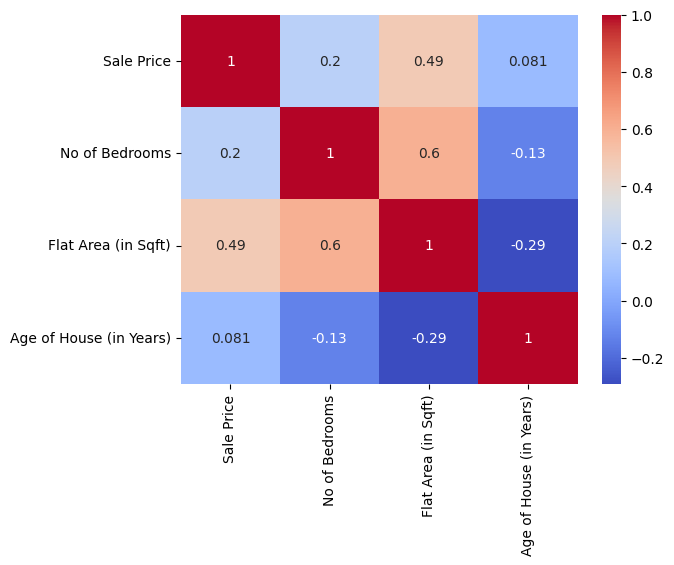

In [183]:
sns.heatmap(data_corr,annot=True,cmap='coolwarm')
plt.show()